Simple Trading Strategy 
------------

All order sizes in the strategies below are for 1 share of INTC stock




A simple midprice movement predictor:
------

We predict and up movement in midprice when the best bid size is greater than best ask size. 

We predict a down movement when the best bid size is less than best bid size. 

When the best bid quantity is equivalent to the best ask quantity, we predict no movement.


The Trading Strategy:
----
   

When we predict an up movement, We place a bid order at the best bid price and an ask order at level 2 to avoid adverse price movement.

Similarly, when we expect a down movement in midprice, we place an bid order on level 2 and an ask order at the best ask price.

When we expect no movement in midprice, we place a bid and an ask order at the best bid and ask price respectively. 


In [1]:
#Mosie Schrem
import pandas as pd
import numpy as np
import os
import math
import sys
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
sys.path.insert(0, os.path.join(os.getcwd(), 'code'))

import OrderBook as ob
import OrderUtil as ou
import FillProbabilitySimulator as fps
import TradingStrategySimulator as tss

#load in intc OrderBook data
book = ob.OrderBook(message_filename='INTC_message.csv', orderbook_filename='INTC_OrderBook.csv')

In [2]:
numupdates = 100
midprice_df = book.get_midprice_data(numupdates=100, t_start=34210, t_end=50000)
midprice_df = midprice_df.iloc[1:]
predictions = -1.0*(midprice_df['aq1'] > midprice_df['bq1']).astype(int) + (midprice_df['aq1'] < midprice_df['bq1']).astype(int)
strat = {1: ([1], [2]), 0: ([1], [1]), -1 : ([2], [1])}
backtester = tss.TradingStrategyBacktester(book=book, numupdates=100, midprice_df=midprice_df,
                                           strategy=strat, predictions=predictions)

In [3]:
backtester.run_strategy()

up to update number: 0
up to update number: 1000
up to update number: 2000
up to update number: 3000


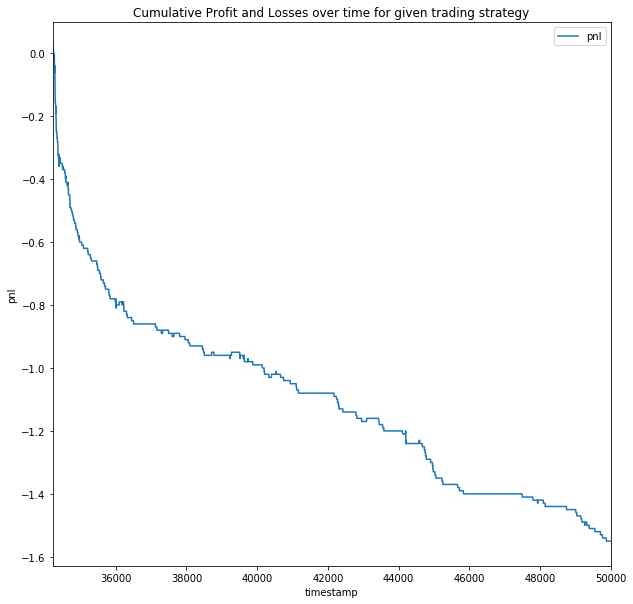

In [4]:
pnl_series = backtester.get_pnl_series()/10000
pnl_series.cumsum().plot()
plt.xlim(pnl_series.index.min(), pnl_series.index.max())
plt.legend(['pnl'])
plt.title('Cumulative Profit and Losses over time for given trading strategy')
plt.ylabel('pnl')
plt.show()

Forward Looking Strategy
-----------

He we run the same trading strategy as above but we predict all up/down midprice movements correctly by looking into the future... 

This is to verify that our trading strategy can indeed generate any profit

In [5]:
numupdates = 100
midprice_df = book.get_midprice_data(numupdates=100, t_start=34210, t_end=50000)
midprice_df = midprice_df.iloc[1:]
predictions = midprice_df['y_1']
strat = {1: ([1], [2]), 0: ([1], [1]), -1 : ([2], [1])}
backtester = tss.TradingStrategyBacktester(book=book, numupdates=100, midprice_df=midprice_df,
                                           strategy=strat, predictions=predictions)

In [6]:
backtester.run_strategy()

up to update number: 0
up to update number: 1000
up to update number: 2000
up to update number: 3000


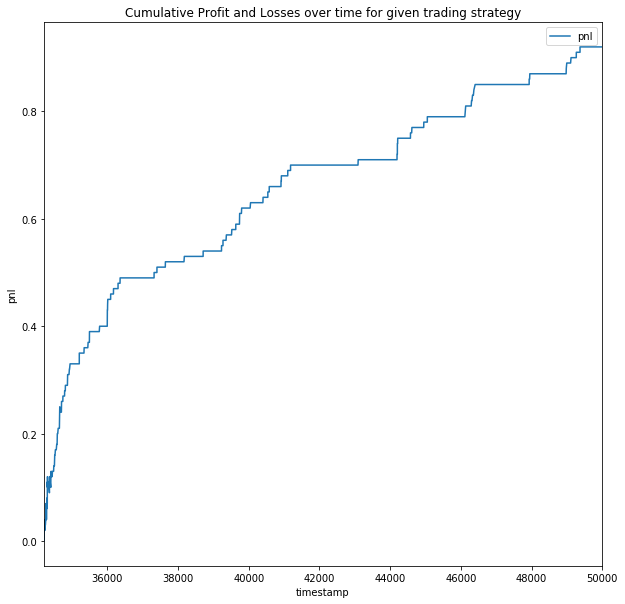

In [7]:
pnl_series = backtester.get_pnl_series()/10000
pnl_series.cumsum().plot()
plt.xlim(pnl_series.index.min(), pnl_series.index.max())
plt.legend(['pnl'])
plt.title('Cumulative Profit and Losses over time for given trading strategy')
plt.ylabel('pnl')
plt.show()